## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [12]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [13]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 5       5       9       8       7       

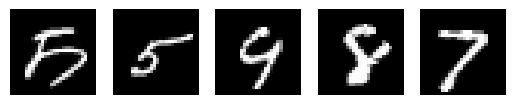

In [14]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [15]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0], 28*28)                              # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0], 28*28)                                 # flatten the images of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]/255
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]/255
y_train = y_train[n_validation:]


In [16]:
print(x_train_flatten.shape)
print(y_train.shape)


(50000, 784)
(50000,)


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [17]:
model = keras.models.Sequential([
        keras.Input(shape=(784,)),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(10, activation="softmax")
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [18]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

n_epochs = 30              # set number of epochs
batch_size = 100          # you can tweak with these parametrs
history = model.fit(x_train_flatten,y_train,epochs=n_epochs,batch_size=batch_size,validation_data=(x_validation,y_validation))

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7253 - loss: 0.8677 - val_accuracy: 0.9430 - val_loss: 0.1957
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9237 - loss: 0.2618 - val_accuracy: 0.9581 - val_loss: 0.1451
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9423 - loss: 0.1962 - val_accuracy: 0.9670 - val_loss: 0.1180
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9493 - loss: 0.1698 - val_accuracy: 0.9666 - val_loss: 0.1106
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9568 - loss: 0.1411 - val_accuracy: 0.9710 - val_loss: 0.1035
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9603 - loss: 0.1290 - val_accuracy: 0.9717 - val_loss: 0.0960
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9636 - loss: 0.1178 - val_accuracy: 0.9730 - val_loss: 0.0922
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9673 - loss: 0.1083 - val_accuracy: 0.

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9745 - loss: 21.0921
Loss =  17.039016723632812
Accuracy = 97.91%


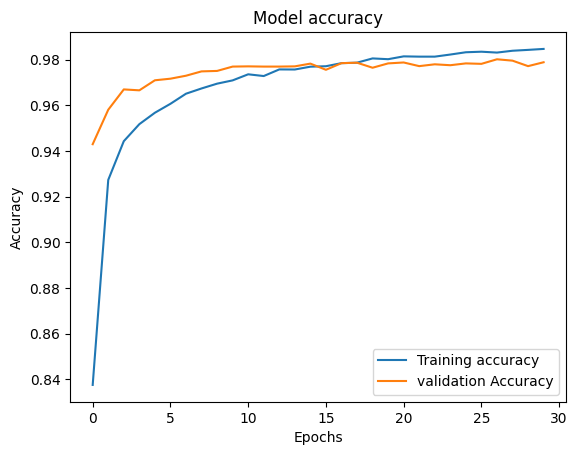

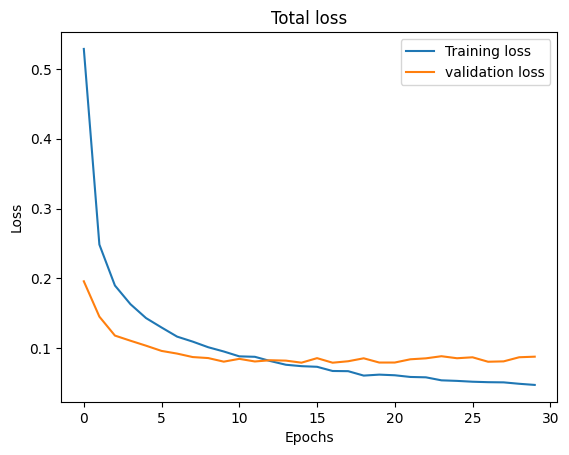

In [21]:
results = model.evaluate(x_test_flatten, y_test)
print("Loss = ",results[0])
print(f"Accuracy = {results[1]*100:.2f}%")

# Plot Accuracy...
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.title("Total loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

label: 
6       1       9       1       6       

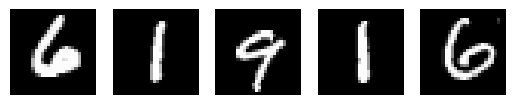

Predicted value: 
6       1       9       1       6       

In [22]:
n = 5   # = no. of images to see predictions on

index = np.random.choice(x_test.shape[0], 5)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind],cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    digit = model.predict((x_test_flatten[ind]).reshape(1, 784), verbose=0)
    digit = np.argmax(digit)
    print(digit,end="       ")